In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_18_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_18_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 5s - loss: 0.3462 - accuracy: 0.8466 - val_loss: 0.2711 - val_accuracy: 0.8757
Epoch 2/100
100000/100000 - 4s - loss: 0.2405 - accuracy: 0.8897 - val_loss: 0.2256 - val_accuracy: 0.8973
Epoch 3/100
100000/100000 - 3s - loss: 0.2146 - accuracy: 0.9021 - val_loss: 0.2101 - val_accuracy: 0.9043
Epoch 4/100
100000/100000 - 4s - loss: 0.2023 - accuracy: 0.9091 - val_loss: 0.2005 - val_accuracy: 0.9105
Epoch 5/100
100000/100000 - 4s - loss: 0.1922 - accuracy: 0.9146 - val_loss: 0.1966 - val_accuracy: 0.9128
Epoch 6/100
100000/100000 - 4s - loss: 0.1823 - accuracy: 0.9197 - val_loss: 0.1863 - val_accuracy: 0.9181
Epoch 7/100
100000/100000 - 4s - loss: 0.1761 - accuracy: 0.9226 - val_loss: 0.1824 - val_accuracy: 0.9204
Epoch 8/100
100000/100000 - 3s - loss: 0.1678 - accuracy: 0.9268 - val_loss: 0.1676 - val_accuracy: 0.9272
Epoch 9/100
100000/100000 - 3s - loss: 0.1548 - accuracy: 0.9323 - val_loss: 0.1582 - val_accu

Epoch 77/100
100000/100000 - 4s - loss: 0.0523 - accuracy: 0.9780 - val_loss: 0.0992 - val_accuracy: 0.9640
Epoch 78/100
100000/100000 - 4s - loss: 0.0504 - accuracy: 0.9789 - val_loss: 0.0981 - val_accuracy: 0.9631
Epoch 79/100
100000/100000 - 3s - loss: 0.0517 - accuracy: 0.9785 - val_loss: 0.0952 - val_accuracy: 0.9625
Epoch 80/100
100000/100000 - 4s - loss: 0.0504 - accuracy: 0.9792 - val_loss: 0.1026 - val_accuracy: 0.9609
Epoch 81/100
100000/100000 - 3s - loss: 0.0490 - accuracy: 0.9796 - val_loss: 0.0986 - val_accuracy: 0.9626
Epoch 82/100
100000/100000 - 3s - loss: 0.0501 - accuracy: 0.9792 - val_loss: 0.1055 - val_accuracy: 0.9609
Epoch 83/100
100000/100000 - 3s - loss: 0.0478 - accuracy: 0.9803 - val_loss: 0.1043 - val_accuracy: 0.9620
Epoch 84/100
100000/100000 - 3s - loss: 0.0495 - accuracy: 0.9795 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 85/100
100000/100000 - 3s - loss: 0.0492 - accuracy: 0.9799 - val_loss: 0.0985 - val_accuracy: 0.9633
Epoch 86/100
100000/100000 -

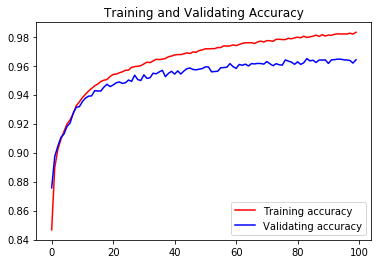

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_18_3_model.h5')

In [16]:
#json_string  = model.to_json()
#with open("C:\\Users\\Wilfred\\Desktop\\json_model.json", "w") as json_file:
#    json_file.write(json_string)

In [5]:
#model.save_weights('C:\\Users\\Wilfred\\Desktop\\Look_ahead_N_4_6_15_2_weights.h5')